📊 Лабораторная работа №2. Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Тема датасета: "Топ 1000 Twitch стримеров". Датасет взят с сайта [kaggle](https://www.kaggle.com/datasets/hibrahimag1/top-1000-twitch-streamers-data-may-2024?resource=download).

In [8]:
# Импортируем все необходимые библиотеки для работы с данными
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline
sns.set(style="ticks")
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Загрузка и первичный анализ данных

In [10]:
# Возьмем датасет с github
data = pd.read_csv('https://raw.githubusercontent.com/cantylv/mlt-bmstu-2024-python/main/lw-2/dataset.csv', sep=",")

In [11]:
print(f"Кол-во строк: {data.shape[0]}")
print(f"Кол-во столбцов: {data.shape[1]}")

print("\n\t\tТипы колонок:")
print(data.dtypes)

# Проверим есть ли пропущенные значения
print("\n\tПропущенные значения в столбцах")
data.isnull().sum()

Кол-во строк: 999
Кол-во столбцов: 17

		Типы колонок:
RANK                                int64
NAME                               object
LANGUAGE                           object
TYPE                               object
MOST_STREAMED_GAME                 object
2ND_MOST_STREAMED_GAME             object
AVERAGE_STREAM_DURATION           float64
FOLLOWERS_GAINED_PER_STREAM       float64
AVG_VIEWERS_PER_STREAM            float64
AVG_GAMES_PER_STREAM              float64
TOTAL_TIME_STREAMED               float64
TOTAL_FOLLOWERS                     int64
TOTAL_VIEWS                         int64
TOTAL_GAMES_STREAMED                int64
ACTIVE_DAYS_PER_WEEK              float64
MOST_ACTIVE_DAY                    object
DAY_WITH_MOST_FOLLOWERS_GAINED     object
dtype: object

	Пропущенные значения в столбцах


RANK                               0
NAME                               0
LANGUAGE                           0
TYPE                               0
MOST_STREAMED_GAME                 0
2ND_MOST_STREAMED_GAME            77
AVERAGE_STREAM_DURATION            0
FOLLOWERS_GAINED_PER_STREAM        0
AVG_VIEWERS_PER_STREAM             0
AVG_GAMES_PER_STREAM               0
TOTAL_TIME_STREAMED                0
TOTAL_FOLLOWERS                    0
TOTAL_VIEWS                        0
TOTAL_GAMES_STREAMED               0
ACTIVE_DAYS_PER_WEEK               0
MOST_ACTIVE_DAY                    0
DAY_WITH_MOST_FOLLOWERS_GAINED     0
dtype: int64

In [12]:
# Посмотрим первые 5 строк датасета
data.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday


#### Обработка пропусков в данных

Способы обратки пропусков:

1.   Удаление столбцов/строк с пустыми значенями.
2.   Заполнение пустых значений нулями (NA - пустое значение).
3.   Внедрение значений (imputation)  

In [13]:
# Удаление столбцов с пустыми значениями (у нас всего один столбец с пустыми значениями)
new_data1 = data.dropna(axis=1, how='any')
(data.shape, new_data1.shape)

((999, 17), (999, 16))

In [14]:
# Удаление строк с пустыми значениями (у нас 77 строк с пустым значением в одном и том же столбце)
new_data2 = data.dropna(axis=0, how='any')
(data.shape, new_data2.shape)

((999, 17), (922, 17))

In [15]:
# Заполнение пустых значений нулями
# В данном случае это будет некорректно, потому что столбец с NA - категориальный параметр (название игры)
new_data3 = data.fillna(0)
# Удалим все строки с NA и сравним с исходным кол-вом строк датасета
new_data3_dropped = new_data3.dropna(axis=0, how='any')
(data.shape, new_data3_dropped.shape)

((999, 17), (999, 17))

##### Поскольку в моем датасете нет пропуска в количественных признаках, воспользуемся другим датасетом для внедрения значений.

In [16]:
# Импортируем стандартный датасет библиотеки seaborn
df_titanic = sns.load_dataset("titanic")

print(f"Кол-во строк: {df_titanic.shape[0]}")
print(f"Кол-во столбцов: {df_titanic.shape[1]}")

print("\n\t\tТипы колонок:")
print(df_titanic.dtypes)

# Проверим есть ли пропущенные значения
print("\n\tПропущенные значения в столбцах")
df_titanic.isnull().sum()

Кол-во строк: 891
Кол-во столбцов: 15

		Типы колонок:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

	Пропущенные значения в столбцах


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
total_count = df_titanic.shape[0]
num_cols = []
for col in df_titanic.columns:
    # Количество пустых значений
    temp_null_count = df_titanic[df_titanic[col].isnull()].shape[0]
    dt = str(df_titanic[col].dtype)
    if temp_null_count>0 and (dt == "float64" or dt == "int64"):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

data_num = df_titanic[num_cols]
data_num

Колонка age. Тип данных float64. Количество пустых значений 177, 19.87%.


,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


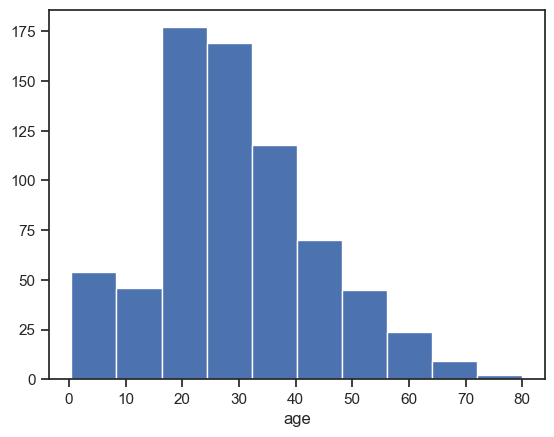

In [18]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df_titanic[col], 10)
    plt.xlabel(col)
    plt.show()

In [19]:
# Будем использовать встроенные средства импьютации библиотеки scikit-learn
data_num_age = data_num[['age']]

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_age)

In [21]:
 # Различные способы импьютации
strategies = ['mean', 'median', 'most_frequent']

def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_age)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0]) # среднее значение

('mean',
 array([29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911

In [23]:
strategies[1], test_num_impute(strategies[1]) # медиана

('median',
 array([28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28

In [24]:
strategies[2], test_num_impute(strategies[2]) # часто повторяющееся

('most_frequent',
 array([24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 

In [25]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [26]:
df_titanic[['age']].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [27]:
test_num_impute_col(df_titanic, 'age', strategies[0]) # среднее значение

('age', 'mean', 177, 29.69911764705882, 29.69911764705882)

In [28]:
test_num_impute_col(df_titanic, 'age', strategies[1]) # медиана

('age', 'median', 177, 28.0, 28.0)

In [29]:
test_num_impute_col(df_titanic, 'age', strategies[2]) # часто повторяющееся

('age', 'most_frequent', 177, 24.0, 24.0)

##### Обработка пропусков в категориальных данных

In [30]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and dt == 'object':
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Количество пустых значений {}, {}%.'.format(col, temp_null_count, temp_perc))

Колонка 2ND_MOST_STREAMED_GAME. Количество пустых значений 77, 7.71%.


In [31]:
sec_game_df = data[['2ND_MOST_STREAMED_GAME']]
sec_game_df.head()

,2ND_MOST_STREAMED_GAME
0,I'm Only Sleeping
1,NBA 2K20
2,I'm Only Sleeping
3,Just Chatting
4,League of Legends


In [32]:
sec_game_df['2ND_MOST_STREAMED_GAME'].unique()

array(["I'm Only Sleeping", 'NBA 2K20', 'Just Chatting',
       'League of Legends', 'VALORANT', 'Counter-Strike',
       'League of Legends: Wild Rift', 'Minecraft', nan, 'Apex Legends',
       'Grand Theft Auto V', 'Fortnite', 'Variety', 'Among Us',
       'Virtual Casino', 'Call of Duty: Warzone', 'Overwatch 2', 'Slots',
       "Garry's Mod", 'Escape from Tarkov', 'PUBG: BATTLEGROUNDS',
       'TrackMania 2: Stadium', 'Special Events', 'Sports',
       'Science & Technology', 'World of Warcraft', 'FIFA 23', 'IRL',
       'FIFA 22', 'Dota 2', 'Teamfight Tactics', 'Tabletop RPGs',
       'Monster Hunter: World', 'Clash Royale', 'Music', 'ELDEN RING',
       'Poker', 'EA Sports FC 24', 'Rust', 'Gartic Phone',
       'Talk Shows & Podcasts', 'The Elder Scrolls Online',
       'The Last of Us Part II', 'The Binding of Isaac: Repentance',
       'TrackMania (1)', 'Winning Eleven: Pro Evolution Soccer 2007',
       'Overwatch', 'Call of Duty: Modern Warfare III',
       'Magic: The Gatheri

In [33]:
sec_game_df[sec_game_df['2ND_MOST_STREAMED_GAME'].isnull()].shape

(77, 1)

In [34]:
# Импьютация наиболее частыми значениями
method_imp = 'most_frequent'
imp2 = SimpleImputer(missing_values=np.nan, strategy=method_imp)
data_imp2 = imp2.fit_transform(sec_game_df)
data_imp2

array([["I'm Only Sleeping"],
       ['NBA 2K20'],
       ["I'm Only Sleeping"],
       ['Just Chatting'],
       ['League of Legends'],
       ['Just Chatting'],
       ['VALORANT'],
       ['Counter-Strike'],
       ['League of Legends: Wild Rift'],
       ['Minecraft'],
       ['Just Chatting'],
       ['Just Chatting'],
       ['VALORANT'],
       ['Apex Legends'],
       ['Minecraft'],
       ['Grand Theft Auto V'],
       ['Fortnite'],
       ['Variety'],
       ['Just Chatting'],
       ['Just Chatting'],
       ['Just Chatting'],
       ['Just Chatting'],
       ['Minecraft'],
       ['Among Us'],
       ['Virtual Casino'],
       ['Fortnite'],
       ['Call of Duty: Warzone'],
       ['Just Chatting'],
       ['Grand Theft Auto V'],
       ['Overwatch 2'],
       ['VALORANT'],
       ['Just Chatting'],
       ['Slots'],
       ["Garry's Mod"],
       ['Just Chatting'],
       ['Minecraft'],
       ['Fortnite'],
       ['Counter-Strike'],
       ['Variety'],
       ['Escape fro

In [35]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['ARK: Survival Evolved', 'ASMR', 'Albion Online', 'Among Us',
       'Animal Crossing: New Horizons', 'Apex Legends', 'Arma 3',
       "Assassin's Creed Valhalla", 'Black Desert', 'Brawl Stars',
       'Call of Dragons', 'Call of Duty: Black Ops 4',
       'Call of Duty: Black Ops Cold War',
       'Call of Duty: Modern Warfare II',
       'Call of Duty: Modern Warfare III', 'Call of Duty: WWII',
       'Call of Duty: Warzone', 'Casino', 'Chess (4)', 'Chess (5)',
       'Chrono Trigger', 'Clash Royale', 'Clone Hero', 'Counter-Strike',
       'Counter-Strike 2 Limited Test', 'Crusader Kings III',
       'DARK SOULS II: Scholar of the First Sin', 'DARK SOULS III',
       'Dark Souls', 'Dark and Darker', 'Dauntless', 'DayZ',
       'Dead by Daylight', 'Destiny', 'Diablo IV', 'Dota 2',
       'Dread Hunger', 'Dungeons & Dragons', 'EA Sports FC 24',
       'ELDEN RING', 'Escape from Tarkov', 'Escape from Tarkov: Arena',
       'F1 22', 'FIFA 18', 'FIFA 20', 'FIFA 21', 'FIFA 22', 'FIF

In [36]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(sec_game_df)
data_imp3

array([["I'm Only Sleeping"],
       ['NBA 2K20'],
       ["I'm Only Sleeping"],
       ['Just Chatting'],
       ['League of Legends'],
       ['Just Chatting'],
       ['VALORANT'],
       ['Counter-Strike'],
       ['League of Legends: Wild Rift'],
       ['Minecraft'],
       ['NA'],
       ['Just Chatting'],
       ['VALORANT'],
       ['Apex Legends'],
       ['Minecraft'],
       ['Grand Theft Auto V'],
       ['Fortnite'],
       ['Variety'],
       ['NA'],
       ['NA'],
       ['Just Chatting'],
       ['Just Chatting'],
       ['Minecraft'],
       ['Among Us'],
       ['Virtual Casino'],
       ['Fortnite'],
       ['Call of Duty: Warzone'],
       ['Just Chatting'],
       ['Grand Theft Auto V'],
       ['Overwatch 2'],
       ['VALORANT'],
       ['NA'],
       ['Slots'],
       ["Garry's Mod"],
       ['Just Chatting'],
       ['Minecraft'],
       ['Fortnite'],
       ['Counter-Strike'],
       ['Variety'],
       ['Escape from Tarkov'],
       ['PUBG: BATTLEGROUNDS'],


In [37]:
'NA' in np.unique(data_imp3)

True

In [38]:
data_imp3[data_imp3=='NA'].size

77

#### Преобразование категориальных признаков в числовые

Кодирование категорий целочисленными значениями (label encoding)


1.   LabelEncoder
2.   OrdinalEncoder



In [39]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,I'm Only Sleeping
1,NBA 2K20
2,I'm Only Sleeping
3,Just Chatting
4,League of Legends
...,...
994,Just Chatting
995,Just Chatting
996,Slots
997,Z1: Battle Royale


##### Использование OrdinalEncoder

In [40]:
data_oe = data[['DAY_WITH_MOST_FOLLOWERS_GAINED', 'MOST_ACTIVE_DAY', 'MOST_STREAMED_GAME', '2ND_MOST_STREAMED_GAME', 'LANGUAGE', 'TYPE']]
data_oe.head()

,DAY_WITH_MOST_FOLLOWERS_GAINED,MOST_ACTIVE_DAY,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,LANGUAGE,TYPE
0,Saturday,Friday,Just Chatting,I'm Only Sleeping,English,personality
1,Sunday,Tuesday,Tom Clancy's Rainbow Six Siege,NBA 2K20,English,personality
2,Sunday,Thursday,League of Legends,I'm Only Sleeping,English,personality
3,Monday,Friday,NBA 2K23,Just Chatting,English,personality
4,Saturday,Wednesday,Just Chatting,League of Legends,Spanish,personality


In [41]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Saturday', 'Friday', 'Just Chatting', "I'm Only Sleeping",
        'English', 'personality'],
       ['Sunday', 'Tuesday', "Tom Clancy's Rainbow Six Siege",
        'NBA 2K20', 'English', 'personality'],
       ['Sunday', 'Thursday', 'League of Legends', "I'm Only Sleeping",
        'English', 'personality'],
       ...,
       ['Thursday', 'Thursday', 'Virtual Casino', 'Slots', 'Portuguese',
        'personality'],
       ['Monday', 'Tuesday', 'Apex Legends', 'Z1: Battle Royale',
        'English', 'personality'],
       ['Sunday', 'Tuesday', 'Minecraft', 'Just Chatting', 'English',
        'personality']], dtype=object)

In [42]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[  2.,   0.,  43.,  73.,   4.,   1.],
       [  3.,   5.,  91.,  95.,   4.,   1.],
       [  3.,   4.,  45.,  73.,   4.,   1.],
       ...,
       [  4.,   4.,  96., 132.,  12.,   1.],
       [  1.,   5.,   4., 177.,   4.,   1.],
       [  3.,   5.,  51.,  76.,   4.,   1.]])

In [43]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4., 5., 6.])

In [44]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0., 1., 2., 3., 4., 5., 6.])

In [45]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104.])

In [46]:
# Уникальные значения 4 признака
np.unique(cat_enc_oe[:, 3])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [47]:
# Уникальные значения 5 признака
np.unique(cat_enc_oe[:, 4])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [48]:
# Уникальные значения 6 признака
np.unique(cat_enc_oe[:, 5])

array([0., 1.])

In [49]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array(['ASMR', 'Albion Online', 'Among Us', 'Animals Aquariums and Zoos',
        'Apex Legends', 'Art', 'Ashes of Creation', 'Brawl Stars',
        'Brawlhalla', 'Call of Duty: Modern Warfare II',
        'Call of Duty: Warzone', 'Casino', 'Chess', 'Counter-Strike',
        'DARK SOULS III', 'Dark Souls', 'DayZ', 'Dead by Daylight',
        'Destiny 2', 'Diablo III', 'Dota 2', 'Dungeons & Dragons',
        'EA Sports FC 24', 'ELDEN RING', 'Escape from Tarkov', 'F1 2019',
        'FIFA 19', 'FIFA 21', 'FIFA 22', 'FIFA 23',
        'FINAL FANTASY XIV ONLINE', 'Fitness & Health', 'Fortnite',
        'Games + Demos', 'Garena Free Fire', 'Genshin Impact', 'GeoGuessr',
        'Grand Theft Auto V', 'Halo Infinite', 'Hearthstone',
        'Heroes of Might and Magic III: The 

In [50]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Saturday', 'Friday', 'Just Chatting', "I'm Only Sleeping",
        'English', 'personality'],
       ['Sunday', 'Tuesday', "Tom Clancy's Rainbow Six Siege",
        'NBA 2K20', 'English', 'personality'],
       ['Sunday', 'Thursday', 'League of Legends', "I'm Only Sleeping",
        'English', 'personality'],
       ...,
       ['Thursday', 'Thursday', 'Virtual Casino', 'Slots', 'Portuguese',
        'personality'],
       ['Monday', 'Tuesday', 'Apex Legends', 'Z1: Battle Royale',
        'English', 'personality'],
       ['Sunday', 'Tuesday', 'Minecraft', 'Just Chatting', 'English',
        'personality']], dtype=object)

##### Использование LabelEncoder

In [51]:
cat_enc['c1'].unique()

array(["I'm Only Sleeping", 'NBA 2K20', 'Just Chatting',
       'League of Legends', 'VALORANT', 'Counter-Strike',
       'League of Legends: Wild Rift', 'Minecraft', 'Apex Legends',
       'Grand Theft Auto V', 'Fortnite', 'Variety', 'Among Us',
       'Virtual Casino', 'Call of Duty: Warzone', 'Overwatch 2', 'Slots',
       "Garry's Mod", 'Escape from Tarkov', 'PUBG: BATTLEGROUNDS',
       'TrackMania 2: Stadium', 'Special Events', 'Sports',
       'Science & Technology', 'World of Warcraft', 'FIFA 23', 'IRL',
       'FIFA 22', 'Dota 2', 'Teamfight Tactics', 'Tabletop RPGs',
       'Monster Hunter: World', 'Clash Royale', 'Music', 'ELDEN RING',
       'Poker', 'EA Sports FC 24', 'Rust', 'Gartic Phone',
       'Talk Shows & Podcasts', 'The Elder Scrolls Online',
       'The Last of Us Part II', 'The Binding of Isaac: Repentance',
       'TrackMania (1)', 'Winning Eleven: Pro Evolution Soccer 2007',
       'Overwatch', 'Call of Duty: Modern Warfare III',
       'Magic: The Gathering (1

In [52]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [53]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем
# задачу классификации и каждое значение категории соответствует
# какому-либо классу целевого признака

le.classes_

array(['ARK: Survival Evolved', 'ASMR', 'Albion Online', 'Among Us',
       'Animal Crossing: New Horizons', 'Apex Legends', 'Arma 3',
       "Assassin's Creed Valhalla", 'Black Desert', 'Brawl Stars',
       'Call of Dragons', 'Call of Duty: Black Ops 4',
       'Call of Duty: Black Ops Cold War',
       'Call of Duty: Modern Warfare II',
       'Call of Duty: Modern Warfare III', 'Call of Duty: WWII',
       'Call of Duty: Warzone', 'Casino', 'Chess (4)', 'Chess (5)',
       'Chrono Trigger', 'Clash Royale', 'Clone Hero', 'Counter-Strike',
       'Counter-Strike 2 Limited Test', 'Crusader Kings III',
       'DARK SOULS II: Scholar of the First Sin', 'DARK SOULS III',
       'Dark Souls', 'Dark and Darker', 'Dauntless', 'DayZ',
       'Dead by Daylight', 'Destiny', 'Diablo IV', 'Dota 2',
       'Dread Hunger', 'Dungeons & Dragons', 'EA Sports FC 24',
       'ELDEN RING', 'Escape from Tarkov', 'Escape from Tarkov: Arena',
       'F1 22', 'FIFA 18', 'FIFA 20', 'FIFA 21', 'FIFA 22', 'FIF

In [54]:
cat_enc_le

array([ 73,  94,  73,  76,  77,  76, 162,  23,  78,  88,  76,  76, 162,
         5,  88,  60,  54, 165,  76,  76,  76,  76,  88,   3, 166,  54,
        16,  76,  60, 100, 162,  76, 131,  57,  76,  88,  54,  23, 165,
        40, 101,  88, 159, 134,  16, 101,  76,  54,  88, 166,  23,  76,
       135,  76, 127,  54,  76,  23,  76, 172,  76,  54, 172,  76,  88,
        47,  16, 172,  60,  74, 165,  23, 162,  88,  46,  60,  60,  23,
       165, 162,  76,  60,  76,  76,  16, 162,  76,  60, 100,  76,  60,
        54, 162, 166,  76,  76,  76, 101,  54,  77,  76,  76, 162, 162,
        35, 146, 146, 135,  23,  76,  88,  77, 172,  23,  88,  54,  88,
        76, 144,  76,  89,  60,  76,  76,  76,  21,  76,  88,  91,  23,
        39, 109,  60,  76,  38,  76, 125,  76, 162,  60,  58, 145, 162,
       125, 151,  77,  23,  78,  40, 152, 149,  76, 158, 145, 171, 162,
       162,  60,  77,  60,  99, 162, 125,  14,  86,  35,  76,  90,  76,
        76,  77,  76,  35,  76,  88,  16,  33, 112, 147,  76,  6

In [55]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177])

#### Кодирование категорий наборами бинарных значений - one-hot encoding

In [56]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

cat_enc_ohe.shape # 178 разных игр (каждое уникальное значение признака становится новым отдельным признаком)

(999, 178)

In [57]:
cat_enc.shape

(999, 1)

##### Pandas get_dummies - быстрый вариант one-hot кодирования

In [58]:
pd.get_dummies(cat_enc).head()

,c1_ARK: Survival Evolved,c1_ASMR,c1_Albion Online,c1_Among Us,c1_Animal Crossing: New Horizons,c1_Apex Legends,c1_Arma 3,c1_Assassin's Creed Valhalla,c1_Black Desert,c1_Brawl Stars,...,c1_Watch Dogs 2,c1_Watch TV,c1_Welcome to the Game II,c1_Winning Eleven: Pro Evolution Soccer 2007,c1_World of Warcraft,c1_World of Warships: Legends,c1_XDefiant,c1_Yu-Gi-Oh! Master Duel,c1_Z1: Battle Royale,c1_osu!
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
pd.get_dummies(sec_game_df, dummy_na=True).head()

,2ND_MOST_STREAMED_GAME_ARK: Survival Evolved,2ND_MOST_STREAMED_GAME_ASMR,2ND_MOST_STREAMED_GAME_Albion Online,2ND_MOST_STREAMED_GAME_Among Us,2ND_MOST_STREAMED_GAME_Animal Crossing: New Horizons,2ND_MOST_STREAMED_GAME_Apex Legends,2ND_MOST_STREAMED_GAME_Arma 3,2ND_MOST_STREAMED_GAME_Assassin's Creed Valhalla,2ND_MOST_STREAMED_GAME_Black Desert,2ND_MOST_STREAMED_GAME_Brawl Stars,...,2ND_MOST_STREAMED_GAME_Watch TV,2ND_MOST_STREAMED_GAME_Welcome to the Game II,2ND_MOST_STREAMED_GAME_Winning Eleven: Pro Evolution Soccer 2007,2ND_MOST_STREAMED_GAME_World of Warcraft,2ND_MOST_STREAMED_GAME_World of Warships: Legends,2ND_MOST_STREAMED_GAME_XDefiant,2ND_MOST_STREAMED_GAME_Yu-Gi-Oh! Master Duel,2ND_MOST_STREAMED_GAME_Z1: Battle Royale,2ND_MOST_STREAMED_GAME_osu!,2ND_MOST_STREAMED_GAME_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Масштабирование данных

In [60]:
sc1 = MinMaxScaler() # приводит значения к диапазону [0, 1]
sc1_data = sc1.fit_transform(data[['FOLLOWERS_GAINED_PER_STREAM']])

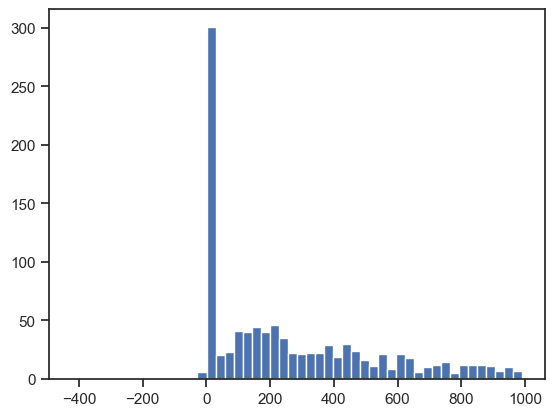

In [61]:
plt.hist(data['FOLLOWERS_GAINED_PER_STREAM'], 50)
plt.show()

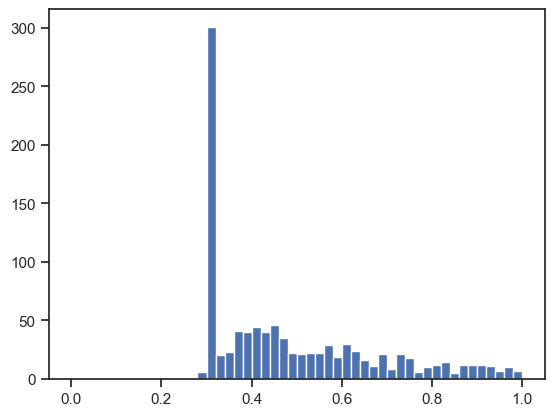

In [62]:
plt.hist(sc1_data, 50)
plt.show()

##### Масштабирование данных на основе Z-оценки - StandardScaler

In [63]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['FOLLOWERS_GAINED_PER_STREAM']])

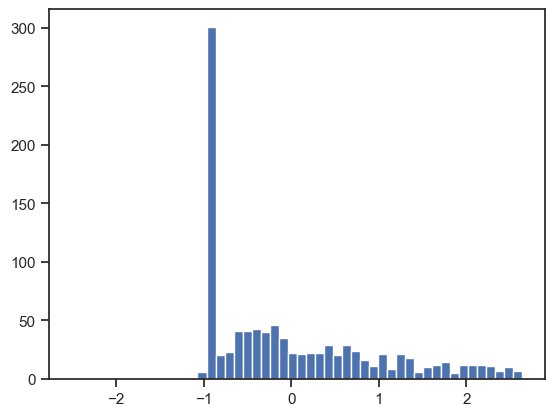

In [64]:
plt.hist(sc2_data, 50)
plt.show()